<a href="https://colab.research.google.com/github/04bhavyaa/computer_vision/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# determine the interest point using sift parameters. use interest points to match corner points of two images.
# rotate and scale one image and match corner points.

In [2]:
!pip install opencv-python opencv-contrib-python

In [13]:
import cv2
import matplotlib.pyplot as plt

In [20]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O test.jpg

img = cv2.imread("test.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
sift = cv2.SIFT_create()

In [22]:
keypoints, descriptors = sift.detectAndCompute(gray, None)

print("Number of keypoints detected:", len(keypoints))
print("Descriptor shape:", descriptors.shape)

Number of keypoints detected: 1111
Descriptor shape: (1111, 128)


In [23]:
img_sift = cv2.drawKeypoints(
    gray, keypoints, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

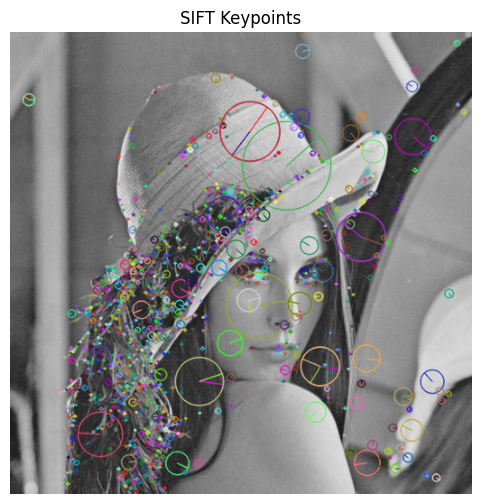

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(img_sift)
plt.title("SIFT Keypoints")
plt.axis("off")
plt.show()

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O img1.jpg
img1 = cv2.imread("img1.jpg", cv2.IMREAD_GRAYSCALE)

In [26]:
rows, cols = img1.shape
M = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 1.5)  # rotate 45°, scale 1.5x
img2 = cv2.warpAffine(img1, M, (cols, rows))

In [27]:
sift = cv2.SIFT_create()

In [28]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

print("Interest points in original image:", len(kp1))
print("Interest points in rotated+scaled image:", len(kp2))

Interest points in original image: 1112
Interest points in rotated+scaled image: 928


In [29]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Lowe’s ratio test
        good_matches.append(m)

print("Good matches after ratio test:", len(good_matches))

Good matches after ratio test: 434


In [30]:
matched_img = cv2.drawMatches(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

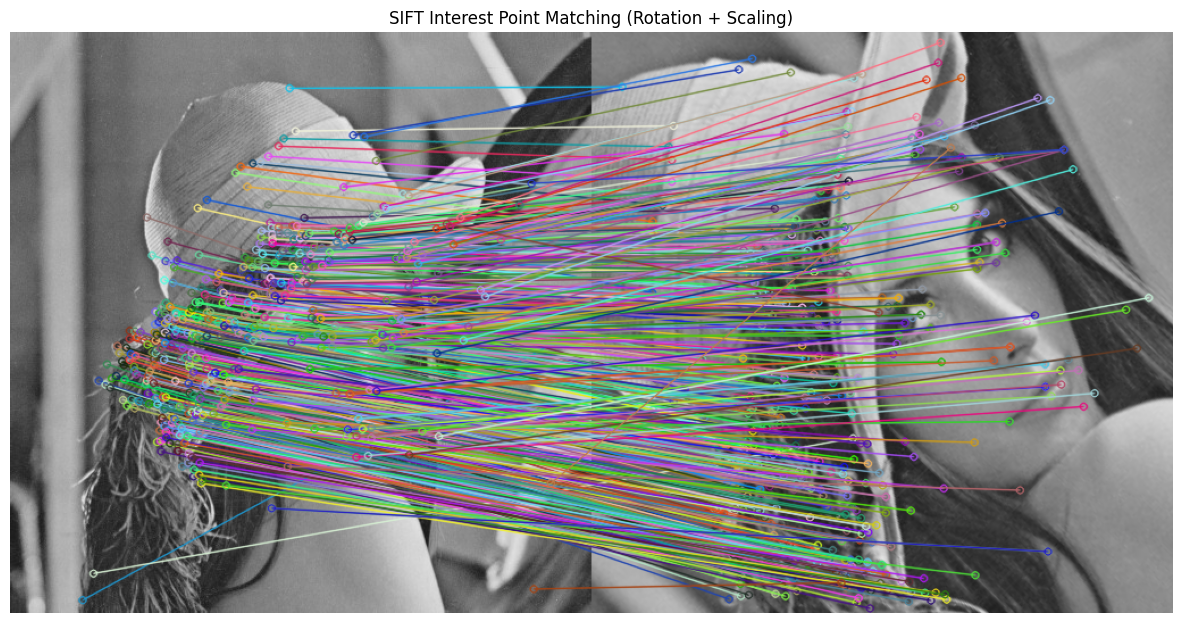

In [31]:
plt.figure(figsize=(15,8))
plt.imshow(matched_img, cmap="gray")
plt.title("SIFT Interest Point Matching (Rotation + Scaling)")
plt.axis("off")
plt.show()